# Rerun hmmsearch: [G3LH89](http://pfam.xfam.org/protein/G3LH89) IS classified as PF00014

...but not linked in Uniprot.
- first I have to remove the G3LH89 sequence from the 'negative dataset' 
- add it to the positives 
- rerun each set


In [3]:
# hmmsearch -Z 1 --noali --max --tblout r2_positive.hits bpti-kunitz.hmm r2_positive.fasta 
# # second negative Training
# hmmsearch -Z 1 --noali --max --tblout r2_negative.hits bpti-kunitz.hmm r2_negative.fasta

### nobumblebee_neg_r2.fasta is the new corrected set of ture negatives
- filesize: 280946 sequences

## Rerun hmmsearch on new positives

In [4]:
# hmmsearch -Z 1 --noali --max --tblout bumble_r2_positive.hits bpti-kunitz.hmm bumblebee_r2_positive.fasta

bumble_r2_positive.hits

In [5]:
# hmmsearch -Z 1 --noali --max --tblout bumble_r2_negative.hits bpti-kunitz.hmm nobumblebee_neg_r2.fasta

# Make file it \$ 1 ID \$ 2 E- vlaue \$ 3 Kind

In [6]:
# extracting the right columns
grep -v "^#" bumble_r2_positive.hits | awk '{print $1,$8,0}'> bumble_r2_positive.out #making 3 column files
grep -v "^#" bumble_r2_negative.hits | awk '{print $1,$8,0}'> bumble_r2_negative.out


SyntaxError: invalid syntax (<ipython-input-6-c7cb2427a44a>, line 2)

In [7]:
head bumble_r2_positive.out
wc bumble_r2_positive.out
echo ''
echo 'neg'
echo ''
head bumble_r2_negative.out
wc bumble_r2_negative.out

SyntaxError: invalid syntax (<ipython-input-7-42820a0c92bb>, line 1)

In [8]:
comm <(grep "^>" nobumblebee_neg_r2.fasta  | sed 's/>//' | sort) <(awk '{print $1}' bumble_r2_negative.out | sort) | awk -F '\t' '{if ($1!="") print $1,10,0}' > missing_bumble_negative_r2.out
# comm <(grep "^>" bumblebee_r2_positive.fasta | sed 's/>//' | sort) <(awk '{print $1}' bumble_r2_positive.out | sort) | awk -F '\t' '{if ($1!="") print $1,10,0}' > bumble_r2_positive.out
cat missing_bumble_negative_r2.out | wc -l
head missing_bumble_negative_r2.out
wc missing_bumble_negative_r2.out

SyntaxError: invalid syntax (<ipython-input-8-86e6ee432b55>, line 1)

In [30]:
!expr 135944 + 145002

280946


### Concattenate negative and missing

In [10]:
cat missing_bumble_negative_r2.out  bumble_r2_negative.out > all_negative_bumble_r2.out

wc -l all_negative_bumble_r2.out
head -3 all_negative_bumble_r2.out

SyntaxError: invalid syntax (<ipython-input-10-8d6d463a90e3>, line 1)

### Reran performance script to obtain corrected results after removing the bumblebee protein from negatives and adding it to positives.

In [11]:
# run performance script again
#python performance_npv.py <(cat all_negative_bumble_r2.out bumble_r2_positive.out) > performance_bumble

* training set performance_bumble
* testing set performance_14.6

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets              # to import data
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score


In [4]:
import pandas as pd


def res_list_of_lists(resfile):
    filelist = []            # generates list of each el represtents one line
    Threshold = []
    ACC = []
    Matthews = []
    TPR = []
    FaPoR = []
    TruNegR = []
    PoPredVal = []
    NegPredVal = []

    with open(resfile, 'r') as rfile:
        filelist = rfile.readlines() # generates list which contains all values of the file
        for i in range(len(filelist)): #generating index
            if 'Threshold:' in filelist[i]:
                el = filelist[i].split(':')
                Threshold.append(float(el[1].rstrip()))
                
            elif 'ACC' in filelist[i]:
                el = filelist[i].split(':')
                ACC.append(float(el[1].rstrip()))
                
            elif 'Matthews' in filelist[i]:
                el = filelist[i].split(':')
                Matthews.append(float(el[1].rstrip()))
                
            elif 'TPR' in filelist[i]:
                el = filelist[i].split(':')
                TPR.append(float(el[1].rstrip()))
                
            elif 'FPR' in filelist[i]:
                el = filelist[i].split(':')
                FaPoR.append(float(el[1].rstrip()))
                
            elif 'TNR' in filelist[i]:
                el = filelist[i].split(':')
                TruNegR.append(float(el[1].rstrip()))
                
            elif 'PositivePredVal:' in filelist[i]:
                el = filelist[i].split(':')
                PoPredVal.append(float(el[1].rstrip()))
                
            elif 'NegPredVal' in filelist[i]:
                el = filelist[i].split(':')
                NegPredVal.append(float(el[1].rstrip()))

            
#         print('Th:', Threshold, 'ACC', ACC, 'Mcc', Matthews, 'true pos', TPR, 'Fapos', FaPoR, 'TruNegR', TruNegR, 'Pospredictive', PoPredVal, 'NegPredVal', NegPredVal)
        
        return Threshold, ACC,Matthews, TPR, FaPoR, TruNegR, PoPredVal, NegPredVal
                
Threshold, ACC, Matthews, TPR, FPR, TNR, PPV, NPV = res_list_of_lists('performance_bumble_2')
# print(Threshold)

# 'Threshold:',th,'ACC:', accuracy(cm),'Matthews:',matthew_cc(cm), "TPR:", tpr(cm), 'FPR:', fpr(cm), 'TNR', 'tnr(cm)', 'Positive pred val:', ppv(cm), 'Neg pred val', npv(cm), "The Matrix:", cm,

dict_bumble = {'Threshold': Threshold, 'ACC': ACC, 'Matthews': Matthews, 'TPR': TPR, 'FPR': FPR, 'TNR':TNR, 'PoPredVal': PPV, 'NegPredVal': NPV}

# dict2 = {'Threshold': Threshold, 'ACC': ACC, 'Matthews': Matthews, 'TPR': TPR, 'FPR': FPR, 'TNR': TNR, 'PPV':PPV, 'NPV':NPV}
# dict1

 
pd.set_option('display.max_rows', None)
bumble_df = pd.DataFrame(dict_bumble) 
bumble_df


,Threshold,ACC,Matthews,TPR,FPR,TNR,PoPredVal,NegPredVal
0,1.000000e+00,0.716058,0.039910,1.000000,0.284122,0.715878,0.002225,1.000000
1,1.000000e-01,0.961828,0.125274,1.000000,0.038196,0.961804,0.016317,1.000000
2,1.000000e-02,0.995970,0.367732,1.000000,0.004033,0.995967,0.135774,1.000000
3,1.000000e-03,0.999758,0.850530,1.000000,0.000242,0.999758,0.723577,1.000000
4,1.000000e-04,0.999943,0.957848,1.000000,0.000057,0.999943,0.917526,1.000000
5,1.000000e-05,0.999982,0.986235,1.000000,0.000018,0.999982,0.972678,1.000000
6,1.000000e-06,0.999986,0.988943,1.000000,0.000014,0.999986,0.978022,1.000000
7,1.000000e-07,0.999996,0.997201,1.000000,0.000004,0.999996,0.994413,1.000000
8,1.000000e-08,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000
9,1.000000e-09,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000


In [42]:
Threshold, ACC, Matthews, TPR, FPR, TNR, PPV, NPV = res_list_of_lists('r2_performance_14.6')
# print(Threshold)

# 'Threshold:',th,'ACC:', accuracy(cm),'Matthews:',matthew_cc(cm), "TPR:", tpr(cm), 'FPR:', fpr(cm), 'TNR', 'tnr(cm)', 'Positive pred val:', ppv(cm), 'Neg pred val', npv(cm), "The Matrix:", cm,

dict_test = {'Threshold': Threshold, 'ACC': ACC, 'Matthews': Matthews, 'TPR': TPR, 'FPR': FPR, 'TNR':TNR, 'PoPredVal': PPV, 'NegPredVal': NPV}

# dict2 = {'Threshold': Threshold, 'ACC': ACC, 'Matthews': Matthews, 'TPR': TPR, 'FPR': FPR, 'TNR': TNR, 'PPV':PPV, 'NPV':NPV}
# dict1
pd.set_option('display.max_rows', None)
test_df = pd.DataFrame(dict_test) 
test_df

,Threshold,ACC,Matthews,TPR,FPR,TNR,PoPredVal,NegPredVal
0,1.000000e+00,0.716054,0.039798,1.000000,0.284125,0.715875,0.002212,1.000000
1,1.000000e-01,0.961825,0.124921,1.000000,0.038199,0.961801,0.016225,1.000000
2,1.000000e-02,0.995966,0.366697,1.000000,0.004036,0.995964,0.135011,1.000000
3,1.000000e-03,0.999755,0.848136,1.000000,0.000246,0.999754,0.719512,1.000000
4,1.000000e-04,0.999940,0.955152,1.000000,0.000061,0.999939,0.912371,1.000000
5,1.000000e-05,0.999979,0.983459,1.000000,0.000021,0.999979,0.967213,1.000000
6,1.000000e-06,0.999982,0.986159,1.000000,0.000018,0.999982,0.972527,1.000000
7,1.000000e-07,0.999993,0.994394,1.000000,0.000007,0.999993,0.988827,1.000000
8,1.000000e-08,0.999996,0.997185,1.000000,0.000004,0.999996,0.994382,1.000000
9,1.000000e-09,0.999996,0.997185,1.000000,0.000004,0.999996,0.994382,1.000000


In [43]:
Threshold, ACC, Matthews, TPR, FPR, TNR, PPV, NPV = res_list_of_lists('r1_performance_14.6')
# print(Threshold)

# 'Threshold:',th,'ACC:', accuracy(cm),'Matthews:',matthew_cc(cm), "TPR:", tpr(cm), 'FPR:', fpr(cm), 'TNR', 'tnr(cm)', 'Positive pred val:', ppv(cm), 'Neg pred val', npv(cm), "The Matrix:", cm,

dict_test = {'Threshold': Threshold, 'ACC': ACC, 'Matthews': Matthews, 'TPR': TPR, 'FPR': FPR, 'TNR':TNR, 'PoPredVal': PPV, 'NegPredVal': NPV}

# dict2 = {'Threshold': Threshold, 'ACC': ACC, 'Matthews': Matthews, 'TPR': TPR, 'FPR': FPR, 'TNR': TNR, 'PPV':PPV, 'NPV':NPV}
# dict1
pd.set_option('display.max_rows', None)
test_df = pd.DataFrame(dict_test) 
test_df

,Threshold,ACC,Matthews,TPR,FPR,TNR,PoPredVal,NegPredVal
0,1.000000e+00,0.716247,0.039929,1.000000,0.283933,0.716067,0.002226,1.000000
1,1.000000e-01,0.962138,0.125797,1.000000,0.037886,0.962114,0.016448,1.000000
2,1.000000e-02,0.995838,0.362626,1.000000,0.004164,0.995836,0.132047,1.000000
3,1.000000e-03,0.999691,0.819445,1.000000,0.000310,0.999690,0.671698,1.000000
4,1.000000e-04,0.999922,0.943361,1.000000,0.000078,0.999922,0.890000,1.000000
5,1.000000e-05,0.999975,0.980691,0.994382,0.000021,0.999979,0.967213,0.999996
6,1.000000e-06,0.999979,0.983245,0.988764,0.000014,0.999986,0.977778,0.999993
7,1.000000e-07,0.999986,0.988757,0.988764,0.000007,0.999993,0.988764,0.999993
8,1.000000e-08,0.999993,0.994363,0.988764,0.000000,1.000000,1.000000,0.999993
9,1.000000e-09,0.999993,0.994363,0.988764,0.000000,1.000000,1.000000,0.999993


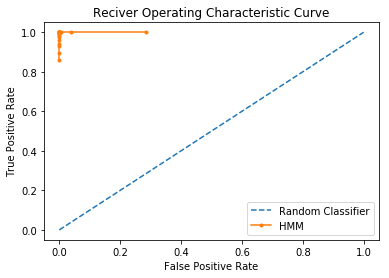

In [9]:
from matplotlib import pyplot
# plot no skill roc curve
pyplot.plot([0, 1], [0, 1], linestyle='--', label='Random Classifier')
tpr = bumble_df['TPR'][:35]
fpr = bumble_df['FPR'][:35]
# plot model roc curve
pyplot.plot(fpr, tpr, marker='.', label='HMM')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.title('Reciver Operating Characteristic Curve')
# show the legend
pyplot.legend()
pyplot.savefig('ROC2.eps', format='eps', bbox_inches='tight')
# show the plot
pyplot.show()

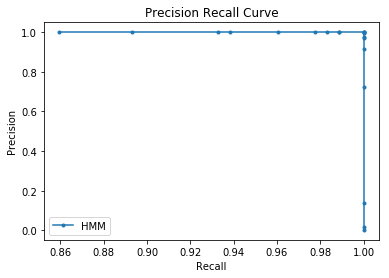

In [10]:
# calculate the no skill line as the proportion of the positive class
#no_skill = len(y[y==1]) / len(y)
# plot the no skill precision-recall curve
#pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
precision = bumble_df['PoPredVal']
recall = bumble_df['TPR']
# plot the model precision-recall curve
pyplot.plot(recall, precision, marker='.', label='HMM')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.title('Precision Recall Curve')
# show the legend
pyplot.legend()
pyplot.savefig('PRC2.eps', format='eps', bbox_inches='tight')
# show the plot
pyplot.show()
